In [26]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

In [56]:
path = 'data/data/'
file = path + 'driving_log.csv'

In [57]:
driving_log = pd.read_csv(file)

In [58]:
driving_log

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


In [59]:
imgs_center = driving_log['center']
imgs_left = driving_log['left']
imgs_right = driving_log['right']
steering = driving_log['steering']

In [60]:
center_imgs = []
for item in imgs_center:
    img = plt.imread(path + item)
    center_imgs.append(img)

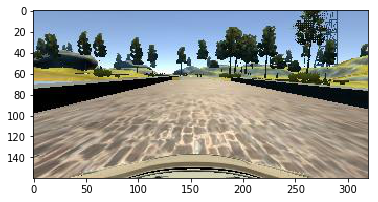

In [61]:
plt.imshow(center_imgs[0])

In [62]:
left_imgs = []
for item in imgs_left:
    img = plt.imread(path + item[1:])
    left_imgs.append(img)

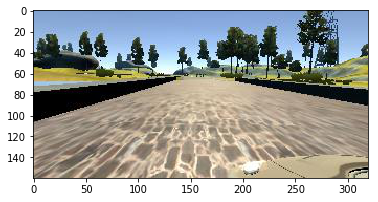

In [63]:
plt.imshow(left_imgs[0])

In [64]:
right_imgs = []
for item in imgs_right:
    img = plt.imread(path + item[1:])
    right_imgs.append(img)

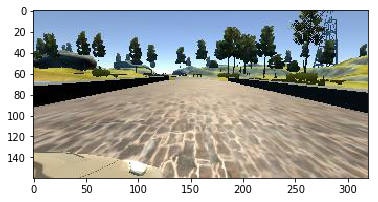

In [65]:
plt.imshow(right_imgs[0])

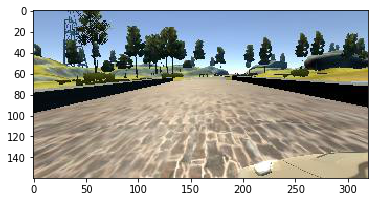

In [66]:
plt.imshow(cv2.flip(right_imgs[0],1))

In [67]:
center_imgs = np.array(center_imgs)
left_imgs = np.array(left_imgs)
right_imgs = np.array(right_imgs)

In [68]:
steering_angle = np.array(steering)

In [69]:
print('center camera imagse shape:',center_imgs.shape)
print('left camera imagse shape:',left_imgs.shape)
print('right camera imagse shape:',right_imgs.shape)
print('steering angle array shape:',steering_angle.shape)

center camera imagse shape: (8036, 160, 320, 3)
left camera imagse shape: (8036, 160, 320, 3)
right camera imagse shape: (8036, 160, 320, 3)
steering angle array shape: (8036,)


# Create x_train and y_train datasets

In [71]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def plot_imgs(imgs, labels, n_cols, n_rows):
    plt.figure(figsize=(10,10))
    gs = GridSpec(n_rows, n_cols)
    gs.update(hspace=0.5, wspace=0.1)
    
    for i in range(n_cols*n_rows):
        ax1 = plt.subplot(gs[i])
        rand_ind = np.random.randint(0,labels.shape[0])
        plt.imshow(imgs[rand_ind])
        plt.text(1,3,'{0}'.format(labels[rand_ind]), color='k', backgroundcolor='c')
        plt.axis('off')
#         plt.xlabel('True: {0}'.format(labels[rand_ind]))

In [72]:
augmented_images, augmented_measurements = [], []
correct_factor = 0.25

for image, meas in zip(center_imgs, steering_angle):
    augmented_images.append(image)
    augmented_measurements.append(meas)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(meas*(-1.0))
    augmented_images.append(augment_brightness_camera_images(image))
    augmented_measurements.append(meas)

for image, meas in zip(left_imgs, steering_angle):
    augmented_images.append(image)
    augmented_measurements.append(meas + correct_factor)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append((meas + correct_factor)*(-1.0))
    augmented_images.append(augment_brightness_camera_images(image))
    augmented_measurements.append(meas)
    
for image, meas in zip(right_imgs, steering_angle):
    augmented_images.append(image)
    augmented_measurements.append(meas - correct_factor)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append((meas - correct_factor)*(-1.0))
    augmented_images.append(augment_brightness_camera_images(image))
    augmented_measurements.append(meas)

In [73]:
# x_train = np.concatenate([center_imgs, left_imgs, right_imgs])
x_train = np.array(augmented_images)
x_train.shape

(72324, 160, 320, 3)

In [74]:
# y_train = np.concatenate([steering_angle, steering_angle, steering_angle])
y_train = np.array(augmented_measurements)
y_train.shape

(72324,)

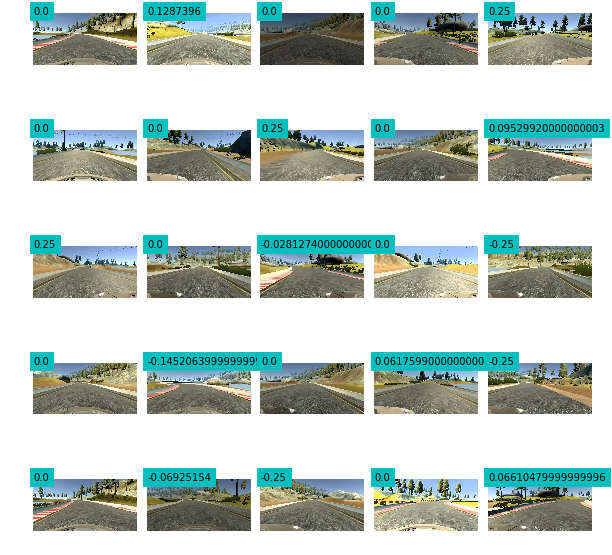

In [75]:
plot_imgs(x_train, y_train, 5, 5)

In [76]:
# np.save('x_train.npy', x_train)
# np.save('y_train.npy', y_train)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

(array([  6.00000000e+00,   2.00000000e+00,   2.90000000e+01,
          3.30000000e+01,   1.69000000e+02,   5.21000000e+02,
          1.66900000e+03,   2.83800000e+03,   1.35330000e+04,
          6.27200000e+03,   2.77950000e+04,   5.38400000e+03,
          1.17250000e+04,   1.60000000e+03,   5.18000000e+02,
          1.70000000e+02,   2.90000000e+01,   1.50000000e+01,
          1.00000000e+01,   6.00000000e+00]),
 array([-1.25 , -1.125, -1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375,
        -0.25 , -0.125,  0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,
         0.75 ,  0.875,  1.   ,  1.125,  1.25 ]),
 <a list of 20 Patch objects>)

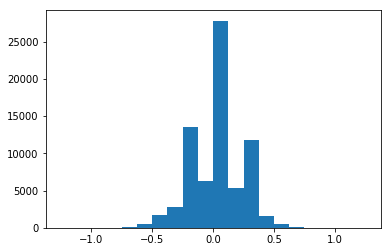

In [77]:
plt.hist(y_train, bins=20, )

# Model architecture

In [1]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Lambda, Flatten, Cropping2D
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.model_selection import train_test_split 
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
keras.__version__

'1.2.1'

In [3]:
model = Sequential()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((50,20), (0,0))))
model.add(Conv2D(20, 5, 5, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(40, 5, 5, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(60, 5, 5, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(80, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(1))

In [4]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 160, 320, 3)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 90, 320, 3)    0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 90, 320, 20)   1520        cropping2d_1[0][0]               
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 45, 160, 20)   0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [81]:
model.compile(optimizer='adam', loss='mse')

In [82]:
x_train.shape , y_train.shape

((72324, 160, 320, 3), (72324,))

In [83]:
filepath='model_weights5.h5'
modelCheckpoint = ModelCheckpoint(filepath, 
                                  monitor = 'val_loss', 
                                  save_best_only = True, 
                                  mode = 'min', 
                                  verbose = 1,
                                 save_weights_only = True)

model.fit(x_train, y_train, batch_size=64, nb_epoch = 5, shuffle=True, validation_split=0.2, callbacks=[modelCheckpoint])

Train on 57859 samples, validate on 14465 samples
Epoch 1/5
57859/57859 [==============================] - 335s - loss: 0.0377 - val_loss: 0.0244
Epoch 2/5
57859/57859 [==============================] - 340s - loss: 0.0147 - val_loss: 0.0208
Epoch 3/5
57859/57859 [==============================] - 339s - loss: 0.0125 - val_loss: 0.0215
Epoch 4/5
57859/57859 [==============================] - 342s - loss: 0.0119 - val_loss: 0.0187
Epoch 5/5
57859/57859 [==============================] - 344s - loss: 0.0115 - val_loss: 0.0161


In [84]:
filepath='model_weights6.h5'
modelCheckpoint = ModelCheckpoint(filepath, 
                                  monitor = 'val_loss', 
                                  save_best_only = True, 
                                  mode = 'min', 
                                  verbose = 1,
                                 save_weights_only = True)

model.fit(x_train, y_train, batch_size=64, nb_epoch = 10, shuffle=True, validation_split=0.2, callbacks=[modelCheckpoint])

Train on 57859 samples, validate on 14465 samples
Epoch 1/10
57859/57859 [==============================] - 337s - loss: 0.0112 - val_loss: 0.0168
Epoch 2/10
57859/57859 [==============================] - 345s - loss: 0.0110 - val_loss: 0.0151
Epoch 3/10
57859/57859 [==============================] - 339s - loss: 0.0108 - val_loss: 0.0155
Epoch 4/10
57859/57859 [==============================] - 339s - loss: 0.0106 - val_loss: 0.0149
Epoch 5/10
57859/57859 [==============================] - 345s - loss: 0.0103 - val_loss: 0.0151
Epoch 6/10
57859/57859 [==============================] - 340s - loss: 0.0101 - val_loss: 0.0144
Epoch 7/10
57859/57859 [==============================] - 339s - loss: 0.0097 - val_loss: 0.0150
Epoch 8/10
57859/57859 [==============================] - 337s - loss: 0.0095 - val_loss: 0.0147
Epoch 9/10
57859/57859 [==============================] - 338s - loss: 0.0093 - val_loss: 0.0142
Epoch 10/10
57859/57859 [==============================] - 335s - loss: 0.009

In [85]:
model.save('model2.h5')